In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

import pickle

pd.set_option('display.max_columns', 150)

In [2]:
raw_data = pickle.load( open( "challenge1", "rb" ) ) # this set includes y as well


In [3]:
print (raw_data.shape)

(100233, 92)


# '건수' 변수에 대한 처리


1) BNK_LNIF_CNT : 은행권 대출건수 <br>
2) CPT_LNIF_CNT: 카드사/할부사/캐피탈 대출건수 <br>
3) SPART_LNIF_CNT : 2산업분류 대출건수 <br>
4) ECT_LNIF_CNT : 기타 금융권 대출건수 <br>
5) CRDT_OCCR_MDIF : 신용대출 최근 개설일부터 유지개월수 <br>
6) SPTCT_OCCR_MDIF : 2산업분류 신용대출계좌 유지개월수 <br>
7) CRDT_CARD_CNT : 신용카드 발급수 <br>
8) CTCD_OCCR_MDIF : 신용카드 개설일부터 유지개월수 <br>
9) CB_GUIF_CNT: 보증 총 건수(서울보증보험) <br>
10) ACTL_FMLY_NUM: 실 가족원수 <br>
11) CUST_FMLY_NUM : 보험가입 가족원수 <br>
12) CRDT_LOAN_CNT  : 한화생명 신용대출건수  <br>
13) CNTT_LAMT_CNT : 실효해지건수(계약해지, 또는 실효난 계약건수 ) <br>
14) LT1Y_CTLT_CNT : 최근 1년 실효해지건수 <br>
15) AUTR_FAIL_MCNT :  자동이체 실패월수 <br>
16) FMLY_CLAM_CNT: 가구 총 보험금 청구건수 <br>
17) FMLY_PLPY_CNT : 가구 만기완납 경험횟수 <br>


In [4]:
count_feature = ['BNK_LNIF_CNT', 'CPT_LNIF_CNT','SPART_LNIF_CNT',\
                 'ECT_LNIF_CNT','CRDT_OCCR_MDIF', 'SPTCT_OCCR_MDIF',\
                  'CRDT_CARD_CNT', 'CTCD_OCCR_MDIF', 'CB_GUIF_CNT',\
                  'ACTL_FMLY_NUM', 'CUST_FMLY_NUM', 'CRDT_LOAN_CNT',\
                  'CNTT_LAMT_CNT','LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT',\
                 'FMLY_CLAM_CNT', 'FMLY_PLPY_CNT']
check_data = raw_data[count_feature]

In [5]:
for i in count_feature:
    print ("Feature name: {} ".format(i))
    print (check_data[i].value_counts())

Feature name: BNK_LNIF_CNT 
1    52455
0    33230
2    12249
3     1982
4      269
5       48
Name: BNK_LNIF_CNT, dtype: int64
Feature name: CPT_LNIF_CNT 
0    66411
1    22452
2     7506
3     2874
4      832
5      158
Name: CPT_LNIF_CNT, dtype: int64
Feature name: SPART_LNIF_CNT 
0    43311
1    34206
2    12731
3     5880
4     2761
5      982
6      271
7       91
Name: SPART_LNIF_CNT, dtype: int64
Feature name: ECT_LNIF_CNT 
0    62042
1    30653
2     5900
3     1213
4      334
5       64
6       27
Name: ECT_LNIF_CNT, dtype: int64
Feature name: CRDT_OCCR_MDIF 
1      30162
0      26056
13     14330
25      9620
37      5351
49      4295
121     2758
61      2302
73      1635
85      1521
97      1339
109      864
Name: CRDT_OCCR_MDIF, dtype: int64
Feature name: SPTCT_OCCR_MDIF 
0      57802
1      11400
13      8899
25      7338
37      3579
121     3174
49      2522
61      1498
73      1118
85      1046
97      1040
109      817
Name: SPTCT_OCCR_MDIF, dtype: int64
Feature nam

 * 일정 개수로 된 변수도있고, 꽤 연속적인 변수도 있다
 * histogram을 그려서 다시 확인 해 봐야겠다

In [6]:
# histogram 그리는 변수

def draw_histogram(features,check_data,bins):
    
    for i in features:
        check_data[i].hist(bins=bins)
        print (i)
                
        plt.show()

BNK_LNIF_CNT


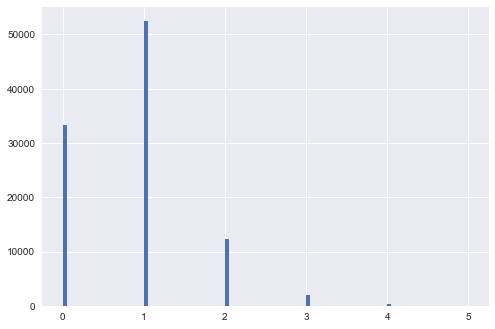

CPT_LNIF_CNT


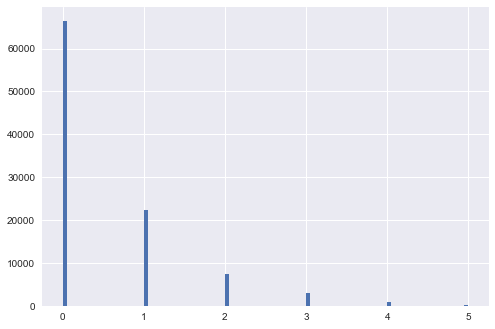

SPART_LNIF_CNT


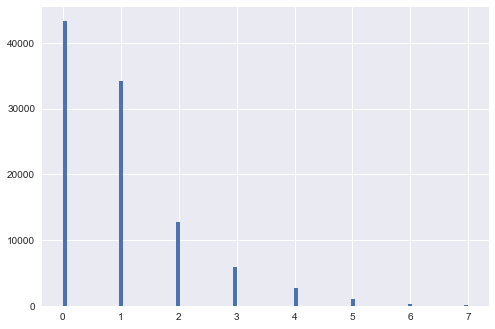

ECT_LNIF_CNT


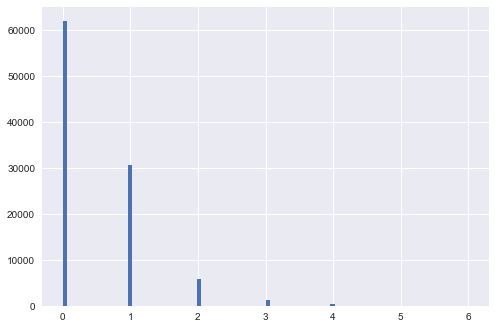

CRDT_OCCR_MDIF


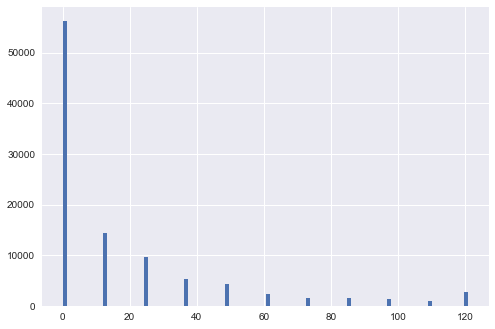

SPTCT_OCCR_MDIF


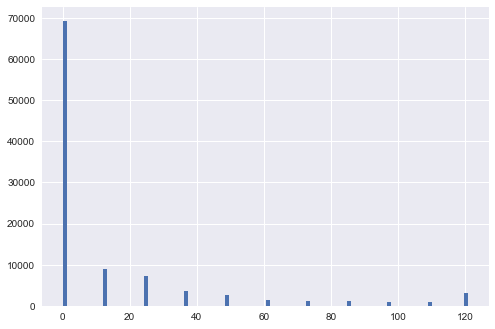

CRDT_CARD_CNT


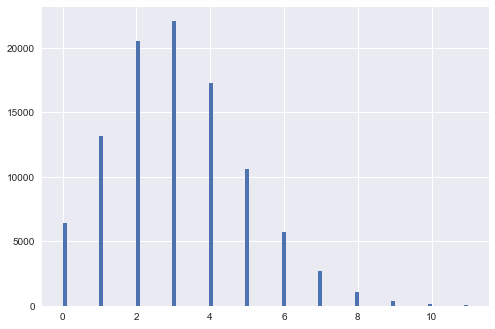

CTCD_OCCR_MDIF


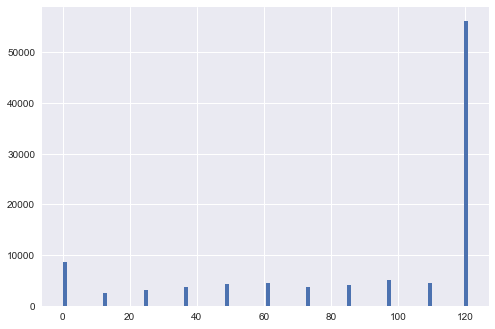

CB_GUIF_CNT


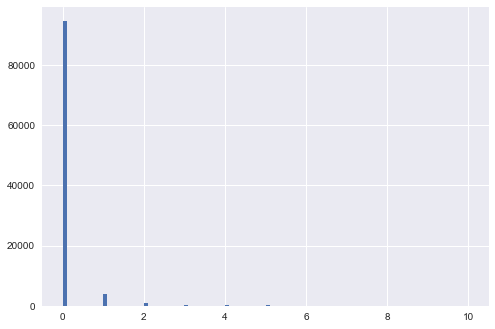

ACTL_FMLY_NUM


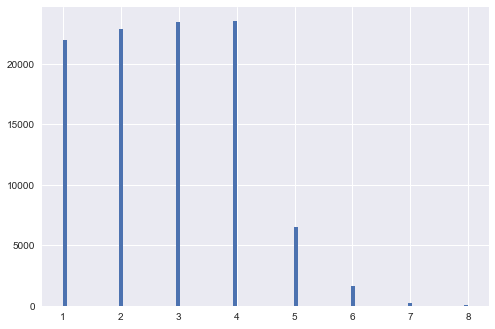

CUST_FMLY_NUM


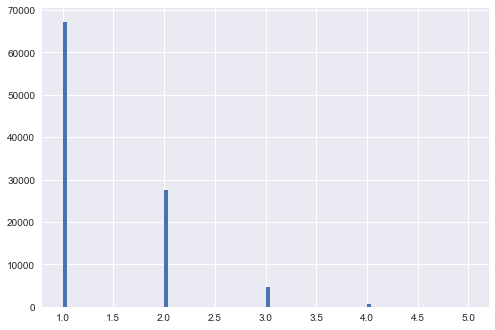

CRDT_LOAN_CNT


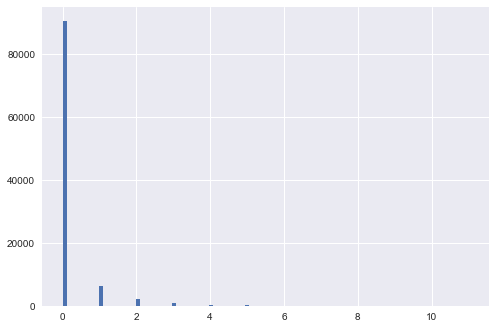

CNTT_LAMT_CNT


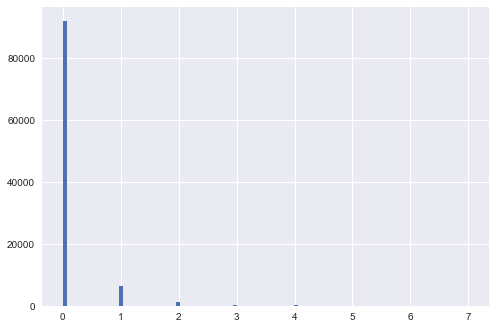

LT1Y_CTLT_CNT


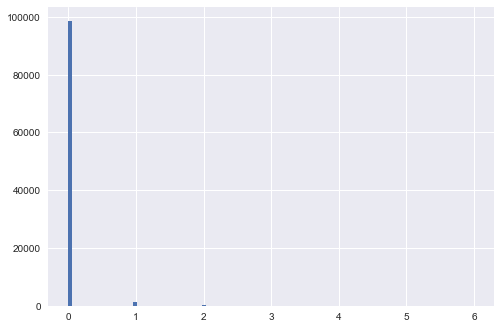

AUTR_FAIL_MCNT


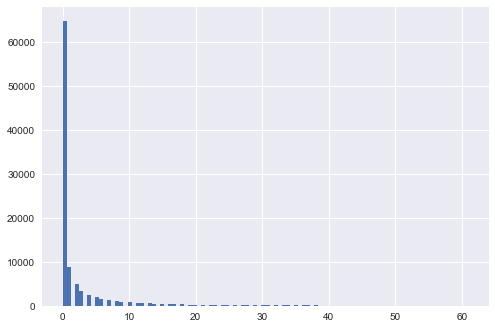

FMLY_CLAM_CNT


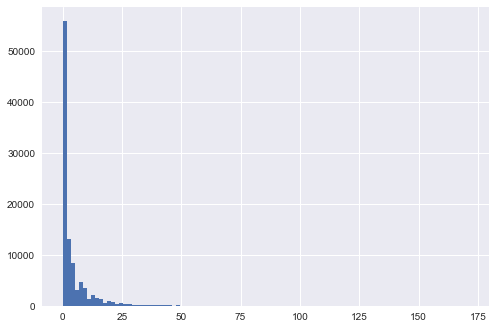

FMLY_PLPY_CNT


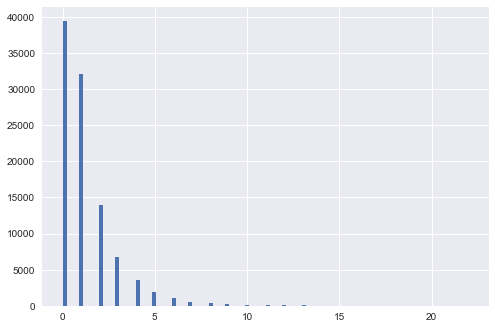

In [7]:
draw_histogram(count_feature, check_data, 100)

* CRDT_CARD_CNT 는 약간 오른쪽으로 치우쳤기 때문에 sqrt
* CTCD_OCCR_MDIF는 왼쪽으로 치우쳤기 때문에 x^3 또는 x^2
* 나머지는 log 변환을 적용 해 보자

In [8]:
def trans_draw_histogram(feature, data, transfunc):
    for i in feature:
        if transfunc == 'sqrt':
            np.sqrt(data[i]).hist(bins=100)
            plt.show()
        elif transfunc == 'x3':
            np.power(data[i],3).hist(bins=100)
            plt.show()
        else:
            np.log(data[i]+1).hist(bins=100)
            plt.show()


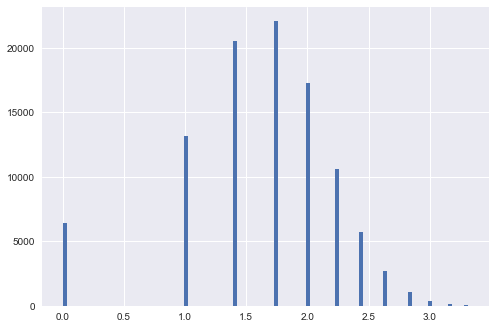

In [9]:
trans_draw_histogram(['CRDT_CARD_CNT'], check_data, 'sqrt')
# 나름 깔끔한 정규 분포가 된다

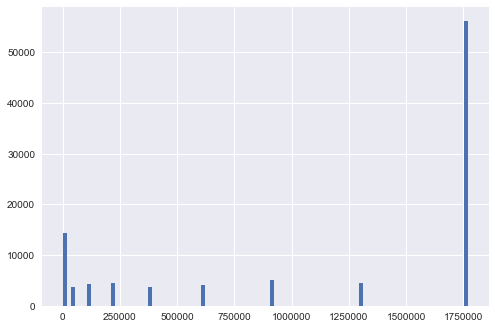

In [10]:
trans_draw_histogram(['CTCD_OCCR_MDIF'], check_data, 'x3')
# 이걸 과연 손을 대는 것이 맞는 걸까

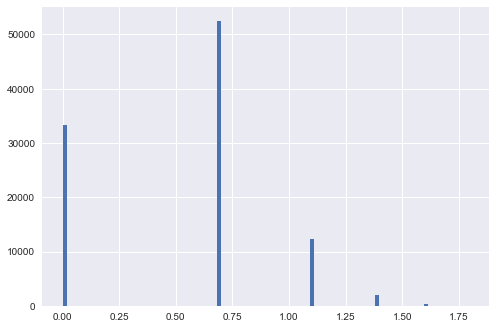

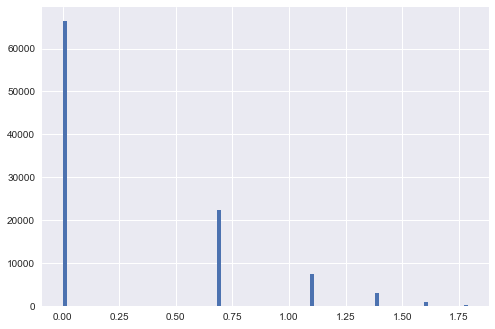

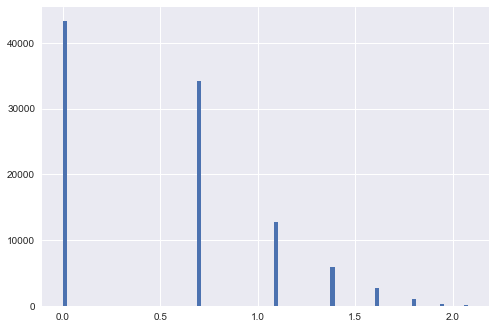

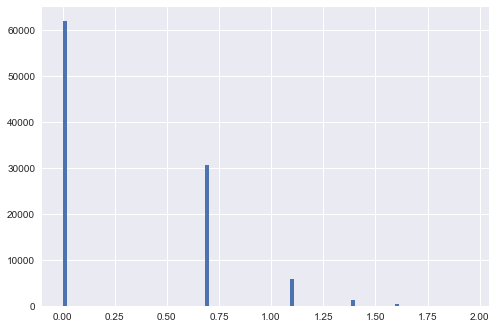

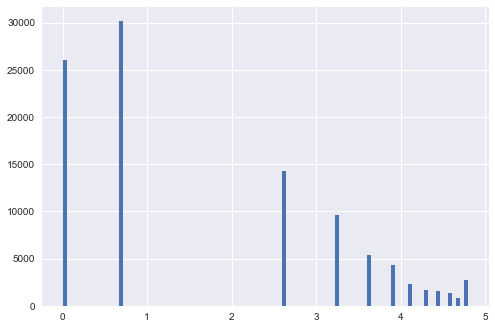

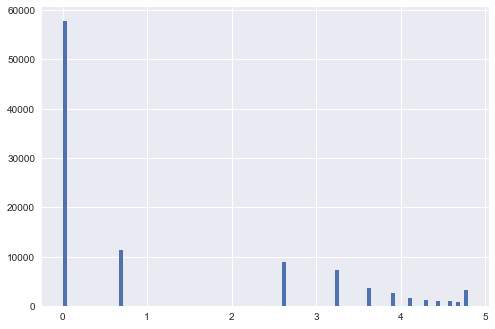

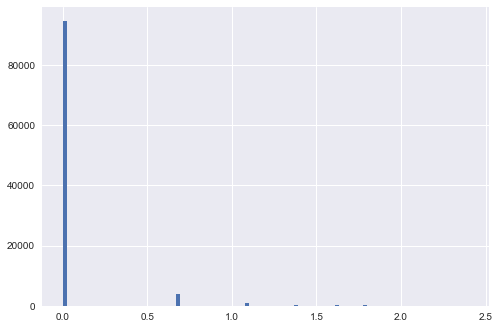

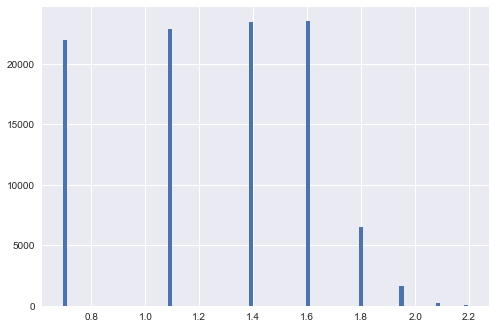

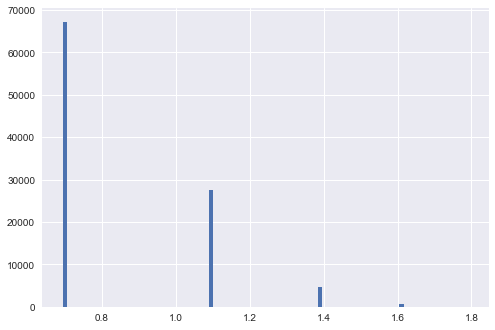

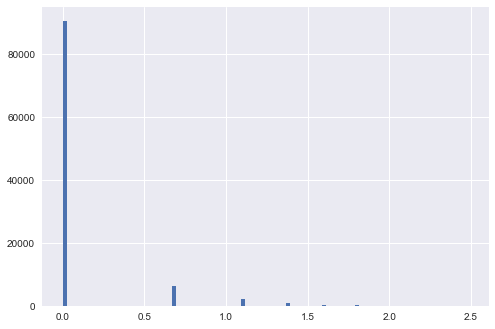

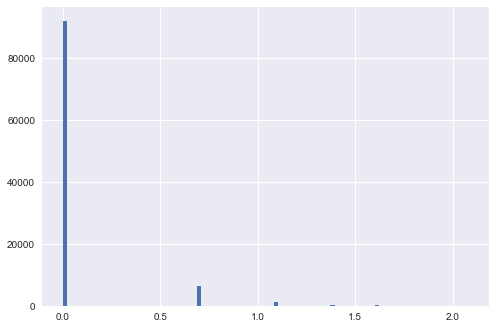

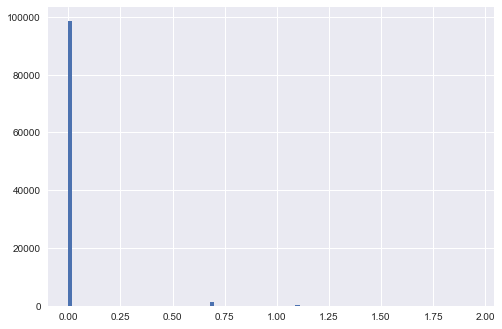

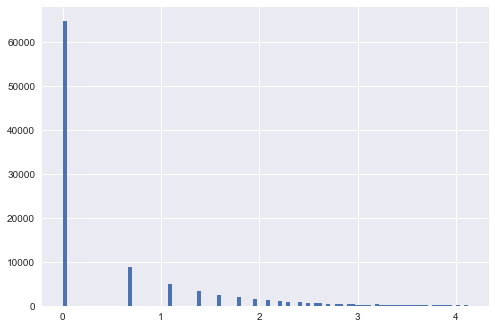

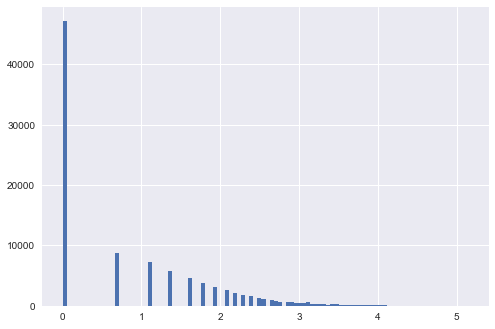

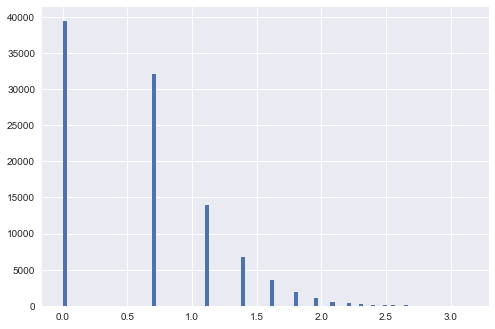

In [11]:
log_count_feature = ['BNK_LNIF_CNT', 'CPT_LNIF_CNT','SPART_LNIF_CNT',\
                 'ECT_LNIF_CNT','CRDT_OCCR_MDIF', 'SPTCT_OCCR_MDIF',\
                   'CB_GUIF_CNT',\
                  'ACTL_FMLY_NUM', 'CUST_FMLY_NUM', 'CRDT_LOAN_CNT',\
                  'CNTT_LAMT_CNT','LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT',\
                 'FMLY_CLAM_CNT', 'FMLY_PLPY_CNT']

trans_draw_histogram(log_count_feature, check_data, 'log')

* 결론, CRDT_CARD_CNT 만 지수 변환을 취하고, 다른 변수는 분포의 변화가 없으므로 그대로 놔두는 것으로 한다

In [12]:
import math 

raw_data['trans_CRDT_CARD_CNT'] = list(map(lambda x : math.sqrt(x), check_data['CRDT_CARD_CNT']))


# '비율' 변수에 대한 처리


1) CRLN_OVDU_RATE : 한화생명 신용대출 연체율 (경과월수 중 연체경험월수 비율) <br>
2) CRLN_30OVDU_RATE : 30일이내 연체경험월 / 30일이내 신용대출월수 * 100 <br>
3) LT1Y_CLOD_RATE : 최근1년 신용대출 연체율 (최근1년 연체경험월 / 최근 1년 신용대출월) *100 <br>
4) PREM_OVDU_RATE : 보험료 연체율 (연체보험횟수 / 총납입 보험횟수) <br>
5) LT1Y_PEOD_RATE : 최근1년 보헌료 연체율 (최근 1년 연체납입횟수 / 총 납입횟수) * 100 <br>
6) AVG_STLN_RATE : 평균약대율 (월별 약관대출 금액 중 약관대출 받은 금액의 비율의 연중평균) <br>
7) LT1Y_SLOD_RATE : 최근1년 약대 연체율 (약관대출 연체경험월수 / 1년약관대출월수)*100<br>

In [13]:
rate_feature = ['CRLN_OVDU_RATE','CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE',\
               'PREM_OVDU_RATE', 'LT1Y_PEOD_RATE','AVG_STLN_RATE',\
               'LT1Y_SLOD_RATE']
check_data = raw_data[rate_feature]

CRLN_OVDU_RATE


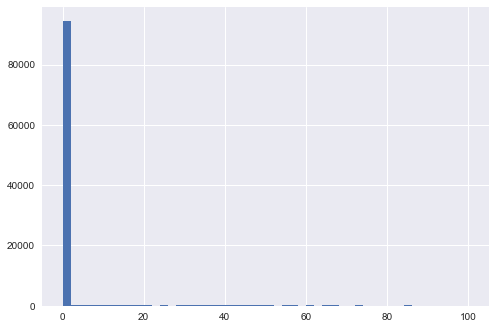

CRLN_30OVDU_RATE


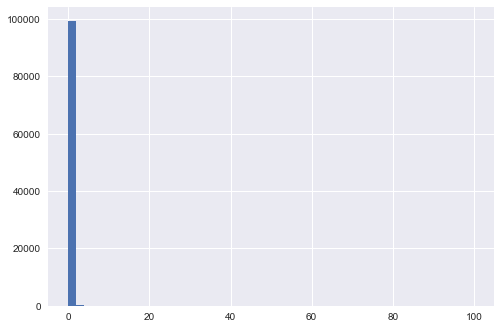

LT1Y_CLOD_RATE


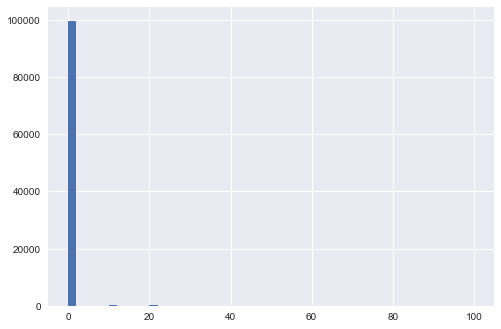

PREM_OVDU_RATE


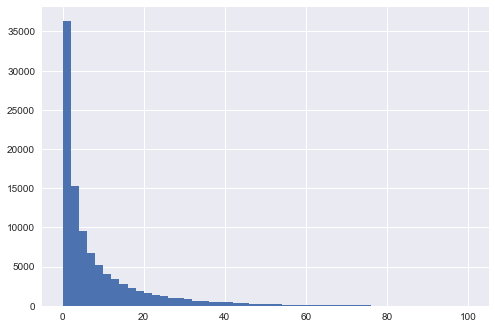

LT1Y_PEOD_RATE


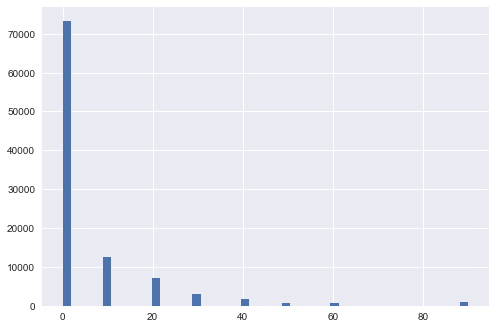

AVG_STLN_RATE


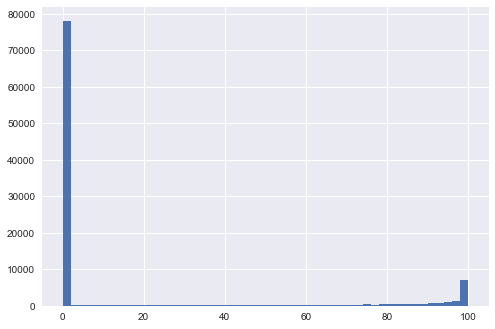

LT1Y_SLOD_RATE


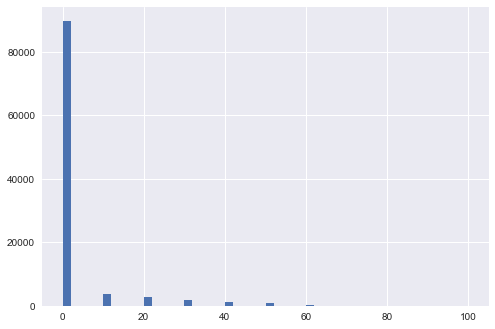

In [14]:
draw_histogram(rate_feature, check_data, 50)

* 'PREM_OVDU_RATE' 만 로그 변환을 취해봐야 할 듯

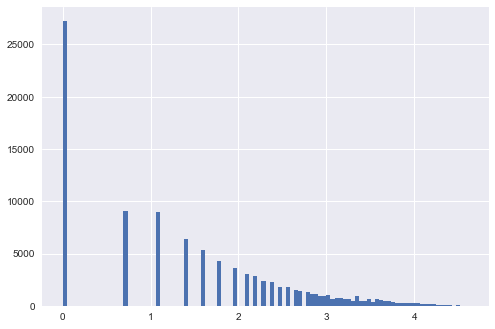

In [15]:
trans_draw_histogram(['PREM_OVDU_RATE'], check_data, 'log')

* 분포에 변화가 없으므로 그대로 놔두기로 한다

# category 변수의 변환

1) OCCP_NAME_G : 직업 <br>
2) MATE_OCCP_NAME_G: 배우자 직업<br>
3) SEX : 성별<br>
4) TEL_MBSP_GRAD : 통신사 멤버쉽 등급<br>
5) CBPT_MBSP_YN : 통신사 결합상품 가입여부 <br>
6) PAYM_METD : 통신요금 납부방법 <br>
7) LINE_STUS : 현재 회선상태 <br>

In [17]:
cat_feature = ['OCCP_NAME_G', 'MATE_OCCP_NAME_G', 'SEX',\
               'TEL_MBSP_GRAD', 'CBPT_MBSP_YN', 'PAYM_METD',\
                'LINE_STUS']
check_data = raw_data[cat_feature]

### OCCP_NAME_G

In [18]:
check_data['OCCP_NAME_G'].value_counts()

# 띄어쓰기 밑 / 기호를 없애야 함

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
비식별          1653
고소득 전문직      1223
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
Name: OCCP_NAME_G, dtype: int64

In [19]:
check_data['OCCP_NAME_G'] = list(map(lambda x: x.replace(" ",""), check_data['OCCP_NAME_G']))


/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
#표기의 간편성을 위해 변수 이름을 바꾼다

check_data['OCCP_NAME_G'].replace({'2차산업종사자': '2차산업', \
                                  '3차산업종사자': '3차산업',\
                                  '단순사무직': '사무보조',\
                                  '고소득전문직':'전문직',\
                                  '1차산업종사자':'1차산업',\
                                  '기업/단체임원':'임원',\
                                  '예체능계종사자':'예술',\
                                  '단순노무직':'노무직'}, inplace=True)



/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [21]:
#get_dummies적용

raw_data =pd.concat([raw_data, pd.get_dummies(check_data['OCCP_NAME_G'], prefix='직업')], axis=1)

### MATE_OCCP_NAME_G

In [22]:
check_data['MATE_OCCP_NAME_G'].value_counts()

미혼          45709
주부          11683
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
단순 사무직       1316
비식별          1027
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64

In [23]:
check_data['MATE_OCCP_NAME_G'] = list(map(lambda x: x.replace(" ",""), check_data['MATE_OCCP_NAME_G']))


In [24]:
check_data['MATE_OCCP_NAME_G'].replace({'2차산업종사자':'2차산업',\
                                       '3차산업종사자':'3차산업',\
                                       '1차산업종사자':'1차산업',\
                                       '단순사무직':'사무보조',\
                                       '기업/단체임원':'임원',\
                                       '고소득전문직':'전문직',\
                                       '단순노무직':'노무직',\
                                       '예체능계종사자':'예술'},inplace=True)

In [25]:
raw_data = pd.concat([raw_data,pd.get_dummies(check_data['MATE_OCCP_NAME_G'], prefix='배우자')], axis=1)

### SEX 

In [26]:
print (check_data['SEX'].value_counts())
print (type(check_data.SEX))

2    54719
1    45514
Name: SEX, dtype: int64
<class 'pandas.core.series.Series'>


In [27]:
temp = pd.get_dummies(check_data['SEX'], prefix="성별")
raw_data = pd.concat([raw_data, temp], axis=1)

### 통신관련 변수

In [28]:
phone_feature = [ 'TEL_MBSP_GRAD','CBPT_MBSP_YN',\
                 'PAYM_METD','LINE_STUS']
for i in phone_feature:
    print (check_data[i].value_counts())

N    46015
R    19862
W    16692
Q    13641
E     4023
Name: TEL_MBSP_GRAD, dtype: int64
N    57716
Y    42517
Name: CBPT_MBSP_YN, dtype: int64
O    56919
K    32364
G     4541
R     3576
N     2833
Name: PAYM_METD, dtype: int64
U    98328
S     1905
Name: LINE_STUS, dtype: int64


In [29]:
temp = pd.get_dummies(check_data[phone_feature], prefix=['SKT등급','결합상품','납부',\
                                                         '회선상태'])

In [30]:
raw_data = pd.concat([raw_data, temp], axis=1)

In [31]:
print (raw_data.shape)

(100233, 142)


In [118]:
raw_data

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE,STRT_CRDT_GRAD,LTST_CRDT_GRAD,PREM_OVDU_RATE,LT1Y_PEOD_RATE,AVG_STLN_RATE,STLN_REMN_AMT,LT1Y_STLN_AMT,LT1Y_SLOD_RATE,GDINS_MON_PREM,SVINS_MON_PREM,FMLY_GDINS_MNPREM,FMLY_SVINS_MNPREM,MAX_MON_PREM,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,AVG_CALL_TIME,AVG_CALL_FREQ,TEL_MBSP_GRAD,ARPU,MON_TLFE_AMT,CBPT_MBSP_YN,MOBL_FATY_PRC,TEL_CNTT_QTR,NUM_DAY_SUSP,CRMM_OVDU_AMT,TLFE_UNPD_CNT,LT1Y_MXOD_AMT,PAYM_METD,LINE_STUS,MOBL_PRIN,MIN_CNTT_DATE_duration,TEL_CNTT_QTR_duration,log_unit_TOT_LNIF_AMT,log_unit_TOT_CLIF_AMT,log_unit_BNK_LNIF_AMT,log_unit_CPT_LNIF_AMT,log_unit_CB_GUIF_AMT,log_unit_CUST_JOB_INCM,log_unit_HSHD_INFR_INCM,log_unit_MATE_JOB_INCM,log_MOBL_PRIN,log_STLN_REMN_AMT,log_GDINS_MON_PREM,log_SVINS_MON_PREM,log_FMLY_GDINS_MNPREM,log_FMLY_SVINS_MNPREM,log_MAX_MON_PREM,log_TOT_PREM,log_FMLY_TOT_PREM,log_ARPU,log_MON_TLFE_AMT,log_CRMM_OVDU_AMT,log_LT1Y_MXOD_AMT,trans_CRDT_CARD_CNT,직업_1차산업,직업_2차산업,직업_3차산업,직업_공무원,직업_기타,직업_노무직,직업_비식별,직업_사무보조,직업_사무직,직업_예술,직업_운전직,직업_임원,직업_자영업,직업_전문직,직업_주부,직업_학생,배우자_1차산업,배우자_2차산업,배우자_3차산업,배우자_공무원,배우자_기타,배우자_노무직,배우자_미혼,배우자_비식별,배우자_사무보조,배우자_사무직,배우자_예술,배우자_운전직,배우자_임원,배우자_자영업,배우자_전문직,배우자_주부,배우자_학생,성별_1,성별_2,SKT등급_E,SKT등급_N,SKT등급_Q,SKT등급_R,SKT등급_W,결합상품_N,결합상품_Y,납부_G,납부_K,납부_N,납부_O,납부_R,회선상태_S,회선상태_U
0,1,0,1,0,0,0,9001000,9001000,9001000,0,1,0,2,13,3,420001000,공무원,54000000,77000000,4,1,24.0,주부,0,0,0,0,0,0,0,0,0,0,12,20,0,0,0,0,190000,0,190000,0,190000,20000000,20000000,0,0,10,0,0,0,50,1,450,493,N,30000,80000,N,800000,20111,0,0,0,0,O,U,580000,0,79,16.012846,16.012846,16.012846,0.000000,19.855768,7348.469228,8774.964387,0.003162,761.577311,0.003162,435.889894,0.003162,435.889894,0.003162,435.889894,4472.135955,4472.135955,173.205081,282.842712,0.003162,0.003162,1.414214,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
1,2,0,1,0,0,0,24001000,0,24001000,0,0,0,2,121,0,0,자영업,55000000,81000000,4,2,29.0,주부,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,110000,0,0,7000000,36000000,0,0,0,300000,2,5,50,1,81,22,N,30000,40000,N,500000,20143,0,0,0,0,O,U,90000,0,37,16.993606,0.000000,16.993606,0.000000,0.000000,7416.198487,9000.000000,0.003162,300.000000,0.003162,0.003162,0.003162,331.662479,0.003162,0.003162,2645.751311,6000.000000,173.205081,200.000000,0.003162,0.003162,1.414214,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
2,3,0,0,1,3,2,15001000,9001000,0,3001000,1,25,4,121,0,0,주부,0,49000000,4,1,34.0,2차산업 종사자,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,100000,11000000,11000000,0,0,0,0,0,2,60,2,139,17,N,30000,40000,Y,500000,20103,0,0,0,0,O,U,120000,0,85,16.523627,16.012846,0.000000,14.914456,0.000000,0.003162,7000.000000,0.003162,346.410162,0.003162,0.003162,0.003162,0.003162,0.003162,316.227766,3316.624790,3316.624790,173.205081,200.000000,0.003162,0.003162,2.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1
3,4,1,0,2,4,2,6001000,3001000,0,3001000,1,25,4,61,0,0,학생,0,101000000,2,1,0.0,미혼,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4000000,4000000,0,0,0,0,0,1,35,1,1118,0,N,30000,80000,N,900000,20144,0,540000,0,630000,G,S,320000,0,34,15.607437,14.914456,0.000000,14.914456,0.000000,0.003162,10049.875621,0.003162,565.685425,0.003162,0.003162,0.003162,0.003162,0.003162,0.003162,2000.000000,2000.000000,173.205081,282.842712,734.846923,793.725393,2.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,5,0,4,0,0,0,21001000,15001000,21001000,0,1,0,1,97,0,

# 변수 생성



In [32]:
# 두 변수들의 비율로 새로운 변수를 생성하는 함수
def make_var(feature1, feature2, var_name):# 1:분모 / 2:분자
    temp=[feature1, feature2]
    check_data = raw_data[temp]+1 # 0인 값이 많기 때문에 1을 더한다
    raw_data[var_name] = check_data[feature2]/check_data[feature1]
    

## (1) 담보대출 비율
* 보증총금액 / 총 대출금액
*  CB_GUIF_AMT / TOT_LNIF_AMT

In [33]:
make_var('TOT_LNIF_AMT', 'CB_GUIF_AMT', 'housing_prop')



## (2) 소득대비 대출금액
* 총 대출금액 / 가구추정소득
* TOT_LNIF_AMT /  HSHD_INFR_INCM

In [34]:
make_var('HSHD_INFR_INCM', 'TOT_LNIF_AMT', 'loan_ver_earn')



## (3) 은행권 대출의 비율
* 은행권 대출금액 / 총대출 금액
*   BNK_LNIF_AMT /TOT_LNIF_AMT

In [35]:
make_var('TOT_LNIF_AMT', 'BNK_LNIF_AMT', 'bank_loan_prop')


## (4) 은행권 내의 본인 등급
* 은행권 대출 금액 / 본인 추정 소득
* BNK_LNIF_AMT /  CUST_JOB_INCM


In [36]:
make_var('CUST_JOB_INCM', 'BNK_LNIF_AMT', 'bank_grade')

## (5) 보험유지 비율
* 만기완납 한 보험 대비해서, 실효된 보험의 비율
* CNTT_LAMT_CNT /  FMLY_PLPY_CNT

In [37]:
make_var('FMLY_PLPY_CNT','CNTT_LAMT_CNT', 'complete_ins')

## (6) 위험대출비중
* 캐피탈, 2금융권 대출 / 총대출
* CPT_LNIF_AMT /TOT_LNIF_AMT

In [38]:
make_var('TOT_LNIF_AMT', 'CPT_LNIF_AMT', 'danger_loan')

## (7) 가구 내 보험가입 비중
* 보험가입 가족원 수 / 실가족원 수
* CUST_FMLY_NUM / ACTL_FMLY_NUM

In [39]:
make_var('ACTL_FMLY_NUM','CUST_FMLY_NUM','insur_fam_prop')

## (8) 통신요금 정지비중
* SKT정지일수 / SKT가입기간
* NUM_DAY_SUSP / TEL_CNTT_QTR_duration(이 변수는 달 기준으므로 '일'로 바꾼다)

In [40]:
raw_data['TEL_CNTT_QTR_duration_day']=raw_data['TEL_CNTT_QTR_duration']*30


In [41]:
make_var('TEL_CNTT_QTR_duration_day', 'NUM_DAY_SUSP', 'SKT_stop_prop')
raw_data.drop('TEL_CNTT_QTR_duration_day',axis=1, inplace=True)

## (9) 은행권 대출 개수 대비 기타대출 비중
* 기타산업,캐피탈, 2금융 대출 개수 / 은행권 대출 개수
* CPT_LNIF_CNT + SPART_LNIF_CNT + ECT_LNIF_CNT / BNK_LNIF_CNT

In [42]:
bad_loan=['CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT']


raw_data['bad_loan'] = raw_data[bad_loan[0]]+ raw_data[bad_loan[1]]+raw_data[bad_loan[2]]
make_var('BNK_LNIF_CNT', 'bad_loan', 'bad_loan_prop')
raw_data.drop('bad_loan', axis=1, inplace=True)


## (10) 월소득 대비 통신비, 보험료
* (FMLY_GDINS_MNPREM + FMLY_SVINS_MNPREM+ MON_TLFE_AMT) / HSHD_INFR_INCM

In [43]:
cost_prop = ['FMLY_GDINS_MNPREM','FMLY_SVINS_MNPREM','MON_TLFE_AMT', 'HSHD_INFR_INCM']

check_data =  raw_data[cost_prop]
check_list = check_data['HSHD_INFR_INCM'].tolist()
check_mean = check_data['HSHD_INFR_INCM'].mean()
for i,val in enumerate(check_list): # 추정소득이 없는 가정은 평균값으로 임시 계산함
    if val == 0:
        check_list[i] = check_mean

check_data['HSHD_INFR_INCM'] = check_list

check_data['cost_prop'] =(check_data[cost_prop[0]]+check_data[cost_prop[1]]+ check_data[cost_prop[2]])/(check_data[cost_prop[3]]+1)


/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [44]:
raw_data['cost_prop'] = check_data['cost_prop']

## ( 11) 자녀의 유무
* 막내자녀나이 의 변수로 자녀의 유무만 따진다
* LAST_CHLD_AGE


In [45]:
child =[]
for i in np.array(raw_data['LAST_CHLD_AGE']):
    if i == 0:
        child.append(0)
    else:
        child.append(1)
        
raw_data['have_child'] = child


    

In [48]:
raw_data.drop('LAST_CHLD_AGE', axis=1, inplace=True)


ValueError: labels ['LAST_CHLD_AGE'] not contained in axis

## (12) 소득대비 신용대출의 비중
* 담보대출과는 별도로 신용대출은 일반적으로 생활비에 많이 사용이 되기 때문
* 신용대출 / 추정 가계 소득
* TOT_CLIF_AMT / HSHD_INFR_INCM 

In [47]:
make_var('HSHD_INFR_INCM', 'TOT_CLIF_AMT', 'credit_prop')

## 연체율

* 어떤 관계가 있을까

1) CRLN_OVDU_RATE : 한화생명 신용대출 연체율 (경과월수 중 연체경험월수 비율) <br>
2) CRLN_30OVDU_RATE : 30일이내 연체경험월 / 30일이내 신용대출월수 * 100 <br>
3) LT1Y_CLOD_RATE : 최근1년 신용대출 연체율 (최근1년 연체경험월 / 최근 1년 신용대출월) *100 <br>
4) PREM_OVDU_RATE : 보험료 연체율 (연체보험횟수 / 총납입 보험횟수) <br>
5) LT1Y_PEOD_RATE : 최근1년 보헌료 연체율 (최근 1년 연체납입횟수 / 총 납입횟수) * 100 <br>
6) AVG_STLN_RATE : 평균약대율 (월별 약관대출 금액 중 약관대출 받은 금액의 비율의 연중평균) <br>
7) LT1Y_SLOD_RATE : 최근1년 약대 연체율 (약관대출 연체경험월수 / 1년약관대출월수)*100<br>


In [49]:
rate_feature = ['CRLN_OVDU_RATE', 'CRLN_30OVDU_RATE',\
                'LT1Y_CLOD_RATE', 'PREM_OVDU_RATE', \
                'LT1Y_PEOD_RATE', 'AVG_STLN_RATE', \
                'LT1Y_SLOD_RATE']

In [51]:
# pivot을 이용해 해당 변수와 label의 비율을 구하는 함수
def pivot_prop(feature1, feature2):
    check_data = raw_data[[feature1, feature2]]
    check_data = check_data.reset_index().groupby([feature1, feature2]).count()
    check_data = check_data.reset_index().pivot(feature1,feature2,'index' ).reset_index()
    check_data['prop'] = check_data[1] / (check_data[0]+check_data[1])
    return check_data
    

In [52]:
# 값을 구간별로 나누는 함수
def make_section(feature1):
    check_data_list = raw_data[feature1].tolist()
    for i, val in enumerate(check_data_list):
        if val == 0:
            check_data_list[i] = 0
        elif int(val/10) ==0:
            check_data_list[i] = 1
        else: 
            check_data_list[i] = int(val/10)
            
    return check_data_list        
            

In [292]:
for i in rate_feature:
    print (i ,"\n")
    print (raw_data[i].value_counts())

CRLN_OVDU_RATE 

0      94387
4        128
2        119
3        113
8        107
34       104
32       103
31       101
10        94
5         94
25        91
50        90
6         89
7         85
43        84
12        84
36        83
33        82
67        80
42        80
40        80
35        78
55        75
39        75
30        74
9         72
17        71
20        71
38        71
54        68
       ...  
11        47
27        46
52        46
64        45
73        45
87        44
1         42
79        42
19        42
78        42
68        41
21        41
88        40
62        40
22        40
76        39
74        38
94        38
83        38
92        37
59        36
71        35
89        34
95        33
96        33
81        32
26        31
91        29
51        27
100       21
Name: CRLN_OVDU_RATE, Length: 99, dtype: int64
CRLN_30OVDU_RATE 

0      99230
1         96
2         94
3         61
4         39
8         37
14        36
16        35
5         33
36     

CRLN_OVDU_RATE


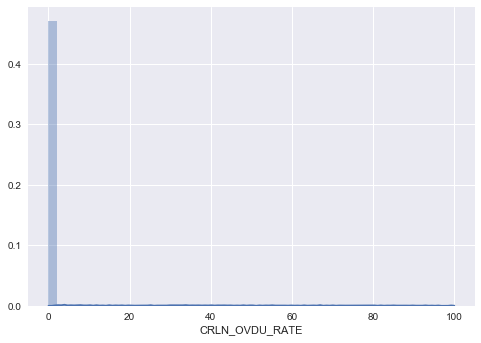

CRLN_30OVDU_RATE


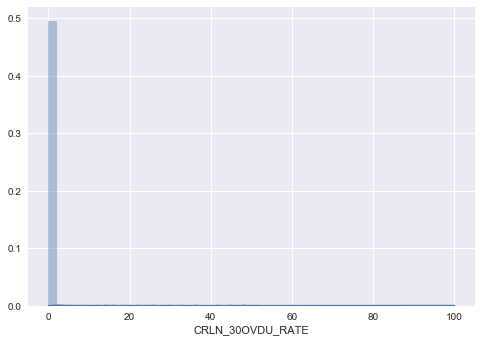

LT1Y_CLOD_RATE


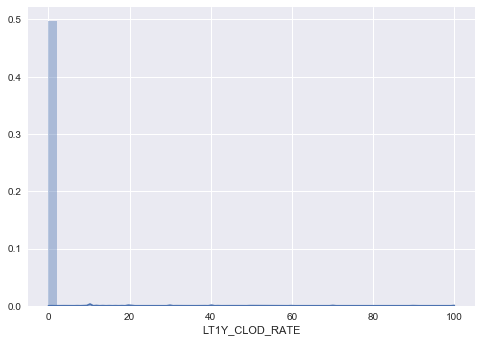

PREM_OVDU_RATE


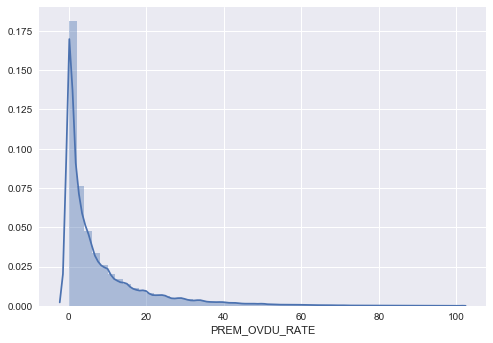

LT1Y_PEOD_RATE


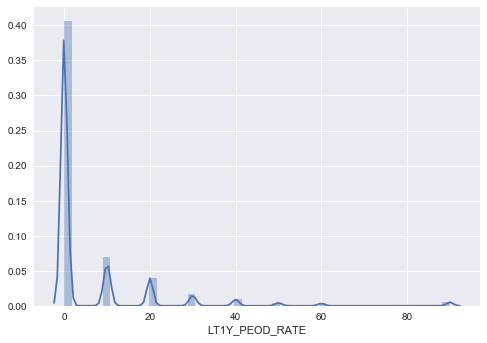

AVG_STLN_RATE


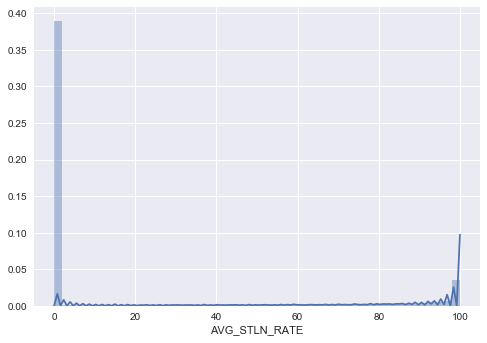

LT1Y_SLOD_RATE


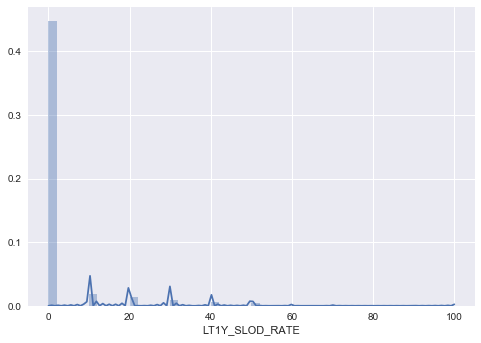

In [53]:
for i in rate_feature:
    print (i)
    sns.distplot(raw_data[i])
    plt.show()

### (13) CRLN_OVDU_RATE
 * (한화생명 신용대출 금액 - 상환금액)* 한화생명 신용대출 연체율 / 100
 * 연체된 금액을 알 수 있다 -> 금액이 크면 상환의지와 관련있지 않을까
 * ( TOT_CRLN_AMT - TOT_REPY_AMT) * CRLN_OVDU_RATE / 100

In [54]:
check_data = raw_data[['TOT_CRLN_AMT','TOT_REPY_AMT','CRLN_OVDU_RATE']]

check_data['overdue_amount_ins'] = (check_data['TOT_CRLN_AMT']-check_data['TOT_REPY_AMT'])*check_data['CRLN_OVDU_RATE']/100
check_data

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,overdue_amount_ins
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0
5,0,0,0,0.0
6,4000000,4000000,81,0.0
7,0,0,0,0.0
8,0,0,0,0.0
9,0,0,0,0.0


In [55]:
check_data['overdue_amount_ins'].value_counts()

0.0           98482
600000.0         37
1200000.0        35
300000.0         31
360000.0         27
400000.0         23
200000.0         23
720000.0         22
100000.0         21
840000.0         21
800000.0         21
320000.0         21
1500000.0        20
480000.0         19
240000.0         19
640000.0         18
280000.0         18
450000.0         18
700000.0         17
1440000.0        17
1400000.0        16
120000.0         16
780000.0         16
180000.0         15
960000.0         15
500000.0         15
900000.0         14
750000.0         13
1320000.0        13
40000.0          13
              ...  
15600000.0        1
8200000.0         1
8970000.0         1
14620000.0        1
4640000.0         1
4450000.0         1
3350000.0         1
1340000.0         1
7750000.0         1
36920000.0        1
11900000.0        1
220000.0          1
7600000.0         1
5170000.0         1
4680000.0         1
9350000.0         1
7820000.0         1
1430000.0         1
7810000.0         1


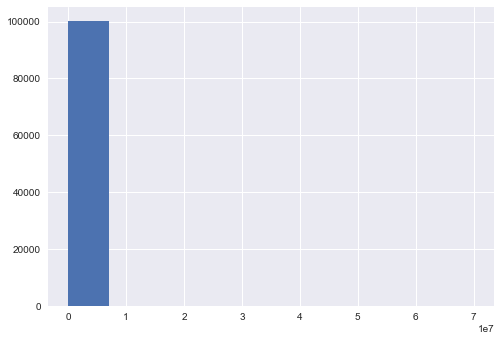

In [56]:
check_data['overdue_amount_ins'].hist(bins=10)
plt.show()

* 이렇게 하니 과거 연체 비율이 높아도, 상계든 뭐든 상환만 되면 금액이 0으로 된다. 그냥 연체 비율 변수의 값을 유무로 변경한다


In [57]:
check_data_list = check_data['CRLN_OVDU_RATE'].tolist()

for i, val in enumerate(check_data_list):
    if val != 0 :
        check_data_list[i] = 1

        
check_data['CRLN_OVDU_RATE'] = pd.DataFrame(check_data_list)


/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
raw_data['CRLN_OVDU_RATE'] = check_data['CRLN_OVDU_RATE']

### (14)LT1Y_CLOD_RATE & CRLN_30OVDU_RATE
* 최근 1년과 30일 내의 연체를 비교 해 보았을 때, 1년 연체기록은 있지만 최근 30일 이내에는 없으면 상환 의지가 있은 것으로 보고 0
* 1년 기록도 있고 & 30일 기록도 있으면 상환 의지가 없는 것으로 보고 1
* 30일 이내의 비중은 대출 부실여부를 가리기에는 불충분 한 것으로 보인다

In [59]:
pivot_prop('LT1Y_CLOD_RATE', 'TARGET') # 최근1년 연체경험 월수 비율


TARGET,LT1Y_CLOD_RATE,0,1,prop
0,0,95388.0,4245.0,0.042606
1,10,218.0,19.0,0.080169
2,20,100.0,5.0,0.047619
3,30,54.0,NaN,NaN
4,40,62.0,6.0,0.088235
5,50,29.0,1.0,0.033333
6,60,14.0,1.0,0.066667
7,70,27.0,2.0,0.068966
8,80,15.0,1.0,0.062500
9,90,17.0,3.0,0.150000


In [60]:
pivot_prop('CRLN_30OVDU_RATE', 'TARGET')

TARGET,CRLN_30OVDU_RATE,0,1,prop
0,0,95008.0,4222.0,0.042548
1,1,89.0,7.0,0.072917
2,2,89.0,5.0,0.053191
3,3,58.0,3.0,0.049180
4,4,36.0,3.0,0.076923
5,5,30.0,3.0,0.090909
6,6,25.0,2.0,0.074074
7,7,28.0,2.0,0.066667
8,8,35.0,2.0,0.054054
9,9,14.0,1.0,0.066667


In [61]:
check_data = raw_data[['LT1Y_CLOD_RATE','CRLN_30OVDU_RATE']]

check_data_list = np.array(check_data)

In [62]:
check_result = []

for i in range(len(check_data_list)):
    if check_data_list[i][0] != 0 and check_data_list[i][1] != 0:
        check_result.append(1)
    else:
        check_result.append(0)
    

check_result

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [63]:
raw_data['credit_long_overdue'] = pd.DataFrame(check_result)

In [64]:
raw_data.drop(['LT1Y_CLOD_RATE','CRLN_30OVDU_RATE'], axis=1, inplace=True)

### (15) PREM_OVDU_RATE
* 오른쪽 쏠림 데이터 이므로 로그 변환을 취해본다

In [65]:
check_data =np.log(raw_data['PREM_OVDU_RATE']+1)

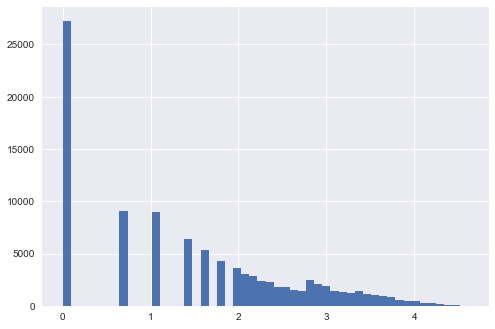

In [66]:
check_data.hist(bins=50)
plt.show()

* 정규화분포가 되지 않은므로 값은 구간을 나눈다

In [67]:


check_data_list = make_section('PREM_OVDU_RATE')
raw_data['PREM_OVDU_RATE_section'] = pd.DataFrame(check_data_list)

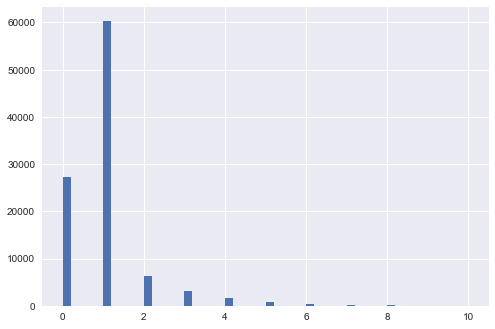

In [68]:
raw_data['PREM_OVDU_RATE_section'].hist(bins=50)
plt.show()

### (16) LT1Y_PEOD_RATE
* 0의 비율이 적은 연체율은 section 화한다

In [69]:
raw_data['LT1Y_PEOD_RATE'].value_counts()
# 섹션으로 나누어져 있다

0     73274
10    12462
20     7197
30     3021
40     1758
90      989
50      848
60      684
Name: LT1Y_PEOD_RATE, dtype: int64

### (17) AVG_STLN_RATE
* 평균 약대율

In [70]:
check_data_list = make_section('AVG_STLN_RATE')

raw_data['AVG_STLN_RATE_section'] = pd.DataFrame(check_data_list)

### (18) LT1Y_SLOD_RATE
* 약대 연체율


In [71]:
raw_data['LT1Y_SLOD_RATE'].value_counts()


0      89720
10      3659
20      2771
30      1692
40      1124
50       958
60       138
100       91
70        58
90        22
Name: LT1Y_SLOD_RATE, dtype: int64

# 더미 변수 한 카테고리 변수 제외하기 

'OCCP_NAME_G', 'MATE_OCCP_NAME_G', 'TEL_MBSP_GRAD', 'CBPT_MBSP_YN', 'TEL_CNTT_QTR', 'LINE_STUS','PAYM_METD',

In [72]:
del_feature = ['OCCP_NAME_G', 'MATE_OCCP_NAME_G', \
               'TEL_MBSP_GRAD', 'CBPT_MBSP_YN', 'TEL_CNTT_QTR', \
               'LINE_STUS','PAYM_METD']

In [73]:
raw_data.drop(del_feature, axis=1, inplace=True)

# 피클

In [74]:


pickle.dump(raw_data, open( "challenge2", "wb" ) )